In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


#enable IPython to display matplolib graphs
%matplotlib inline

from sklearn import tree


In [2]:
from ML_classes.DTModel import DTModel


2022-03-29 11:38:03.759559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 11:38:03.759579: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
weather_data = pd.read_csv("./data/weather_hourly_darksky.csv")
weather_data["time"] = pd.to_datetime(weather_data["time"])
weather_data["temperature"] = pd.to_numeric(weather_data["temperature"], downcast="float", errors="coerce")



In [4]:
#type(weather_data["temperature"].iloc[0])
weather_data["temperature"].isna().sum() 


0

In [5]:
df = pd.read_csv('./data/ouput.csv')
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")


#max_value_energy = df["energy(kWh/hh)"].max()
#df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
#df.sort_values('tstp', inplace=True)



In [6]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000153")
hh.pop("LCLid")

#making data hourly or not
#hh = hh.set_index("tstp")
#hh = hh.resample("H").sum()
#hh = hh.reset_index()

#use of weather data
#weather_data = weather_data.set_index("time")
#weather_set = weather_data[str(hh["tstp"].min()):str(hh["tstp"].max())]
#weather_set = weather_set.reset_index()
#hh["temperature"] = weather_set["temperature"]
# weather data doesnt necessarily contain data for all dates
#hh.dropna(axis=0,how='any',subset=["temperature"], inplace=True)

hh_max = hh['energy(kWh/hh)'].max()
hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)

#the following line of code is depreciated
#hh['temperature'] = hh['temperature'].apply(lambda x: x / hh_max)

/tmp/ipykernel_173666/3595312128.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)


In [7]:
#weather_set["temperature"]


hh.tail()

,tstp,energy(kWh/hh)
317183,2014-02-27 22:00:00,0.126028
317184,2014-02-27 22:30:00,0.154479
317185,2014-02-27 23:00:00,0.179373
317186,2014-02-27 23:30:00,0.068460
317187,2014-02-28 00:00:00,0.499889


In [8]:
# Initiating the class
DT = DTModel(
data = hh,
Y_var = 'energy(kWh/hh)',
lag = 24,
epochs = 20,
batch_size = 256,
train_test_split = 0.15,
data_creator = "plain"
)

In [9]:
DT.DTModel()

DecisionTreeRegressor()

In [10]:
yhat = DT.predict()
yhat

[0.04867748238569501,
 0.05356745783054253,
 0.07935096411935576,
 0.03534118511572813,
 0.03534118511572813,
 0.024672149287017702,
 0.0266725928838812,
 0.02333851856638948,
 0.02044898837445802,
 0.06468104109691834,
 0.023116248159661908,
 0.06468104109691834,
 0.027339409072221592,
 0.027339409072221592,
 0.02333851856638948,
 0.020671260437238152,
 0.02711713700944146,
 0.026450322477153627,
 0.024672149287017702,
 0.026228050414373497,
 0.024005334754729872,
 0.20849077756251744,
 0.03400755605115247,
 0.04912202651125527,
 0.02022671631167789,
 0.03111802585922101,
 0.03111802585922101,
 0.026005778351593366,
 0.019115359309882358,
 0.015781284992390638,
 0.020671260437238152,
 0.0171149140569663,
 0.01689264199418617,
 0.02444987722423757,
 0.019337629716609926,
 0.05979106233996571,
 0.02000444590495032,
 0.06023560646552597,
 0.1262502799391251,
 0.054678818144443184,
 0.054678818144443184,
 0.3262947389886283,
 0.05156701257762647,
 0.4521004416811419,
 0.032896199049356936

In [11]:
#type(DT.dc)

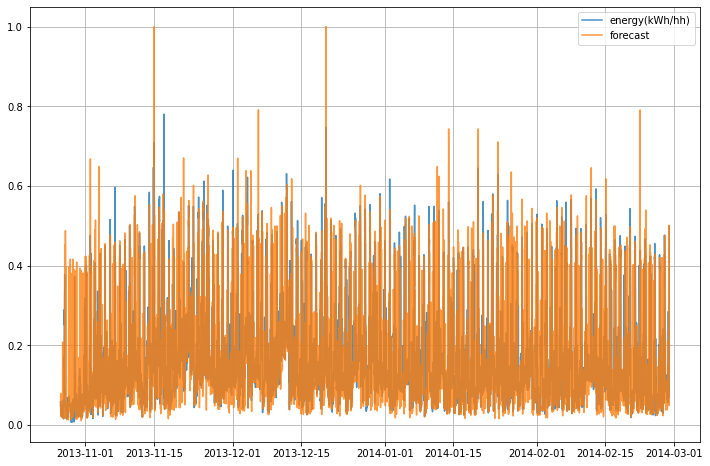

In [13]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = hh['energy(kWh/hh)'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = DT.dc.create_X_Y(ts, lag=lag_model)

#for time values
#tlist = hh['temperature'].tail(lag_model).values.tolist()
#print(tlist)
#X, _ = DT.dc.create_X_Y(ts, tlist, lag=lag_model)
#print(X)

X = DT.alter_x_shape(X)
# Getting the forecast
yhat = DT.model.predict(X)

yhat = DT.predict()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_173666/1421302785.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


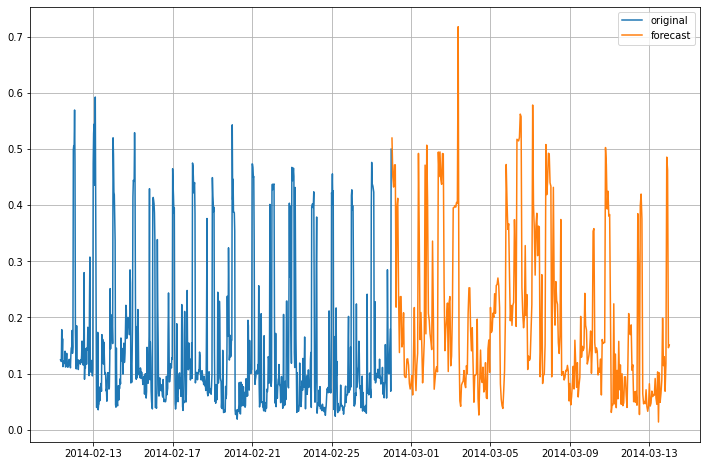

In [14]:
#Forecasting n steps ahead, dont have weather data for n ahead however
n_ahead = 168 *2
yhat = DT.predict_n_ahead(n_ahead)
yhat = [y[0] for y in yhat]

#Constructing the forecast dataframe
fc = hh.tail(800).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)
#Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [15]:
DT.eval.MSE()

0.013615323553191524

In [16]:
DT.eval.RMSE()

0.11668471859327392

In [17]:
DT.eval.MAE()

0.07205830595924848

In [18]:
DT.eval.MAPE()

67.98254886374815

In [23]:
peaks, indexes, res = DT.eval.peak_daily_consumption()

5954


In [24]:
res

61.460144227510675

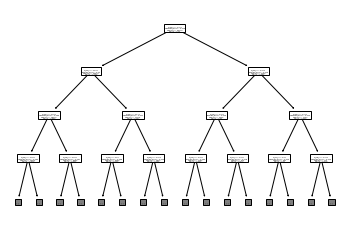

In [19]:
DT.plot_dt()

In [20]:
#train for all houses
lclid_list = df['LCLid'].unique().tolist()
#print(type(lclid_list))
mse = []
rmse = []
mae = []
mape = []
for lclid in lclid_list:
    #print(lclid)


    hh = find_household(lclid)
    hh.pop("LCLid")
    #hh = hh.set_index("tstp")
    #hh = hh.resample("H").sum()
    #hh = hh.reset_index()

    hh_max = hh['energy(kWh/hh)'].max()
    hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
    
    # Initiating the class
    DT = DTModel(
    data = hh,
    Y_var = 'energy(kWh/hh)',
    lag = 24,
    epochs = 20,
    batch_size = 256,
    train_test_split = 0.15
    )
    #training
    DT.DTModel()
    
    mse.append(DT.eval.MSE())
    rmse.append(DT.eval.RMSE())
    mae.append(DT.eval.MAE())
    mape.append(DT.eval.MAPE())
houses = pd.Series(data=lclid_list,name="lclid")
mse = pd.Series(data=mse,name="mse")
rmse = pd.Series(data=rmse,name="rmse")
mae = pd.Series(data=mae,name="mae")
mape = pd.Series(data=mape,name="mape")

res_df = pd.merge(houses, mse, right_index=True, left_index=True)
res_df["rmse"] = rmse
res_df["mae"] = mae
res_df["mape"] = mape



/tmp/ipykernel_173666/3998984397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
/tmp/ipykernel_173666/3998984397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
/tmp/ipykernel_173666/3998984397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [21]:
res_df

,lclid,mse,rmse,mae,mape
0,MAC000168,0.009594,0.097948,0.034800,99.444906
1,MAC000169,0.009386,0.096879,0.051487,80.136699
2,MAC000179,0.006505,0.080654,0.040791,64.245980
3,MAC000181,0.005248,0.072443,0.028371,46.616779
4,MAC000165,0.013265,0.115172,0.064230,33.113211
5,MAC000173,0.011548,0.107464,0.063002,60.130553
6,MAC000152,0.011215,0.105903,0.057446,111.187156
7,MAC000153,0.013561,0.116451,0.071312,65.541847
8,MAC000159,0.004573,0.067623,0.036635,48.702208
9,MAC000150,0.011416,0.106847,0.056790,74.520842
